# 1D covnets from Imdb Data

In [1]:
from keras.datasets import imdb
from keras.utils import pad_sequences

In [2]:
max_features = 10000
max_len = 500
print('loading data..')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

loading data..


In [3]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


### Evaluating Model

In [5]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [6]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

In [10]:
model.compile(optimizer=RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 70s 440ms/step - loss: 0.2026 - acc: 0.9312 - val_loss: 0.4854 - val_acc: 0.8698
Epoch 2/10
157/157 [==============================] - 70s 444ms/step - loss: 0.1835 - acc: 0.9395 - val_loss: 0.5317 - val_acc: 0.8672
Epoch 3/10
157/157 [==============================] - 63s 402ms/step - loss: 0.1669 - acc: 0.9467 - val_loss: 0.5277 - val_acc: 0.8720
Epoch 4/10
157/157 [==============================] - 59s 378ms/step - loss: 0.1521 - acc: 0.9541 - val_loss: 0.5614 - val_acc: 0.8692
Epoch 5/10
157/157 [==============================] - 56s 355ms/step - loss: 0.1388 - acc: 0.9592 - val_loss: 0.5859 - val_acc: 0.8702
Epoch 6/10
157/157 [==============================] - 58s 369ms/step - loss: 0.1264 - acc: 0.9649 - val_loss: 0.6008 - val_acc: 0.8724
Epoch 7/10
157/157 [==============================] - 70s 444ms/step - loss: 0.1148 - acc: 0.9700 - val_loss: 0.6126 - val_acc: 0.8740
Epoch 8/10
157/157 [==============================] - 9

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


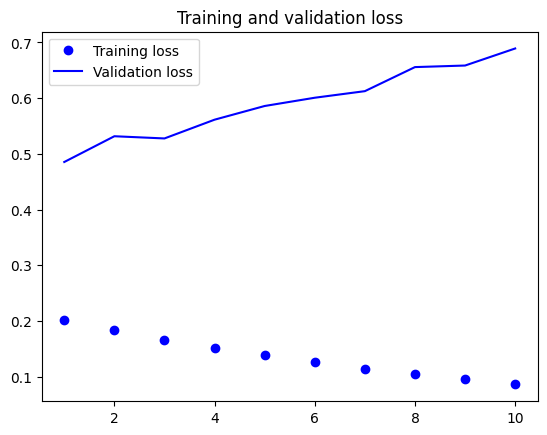

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()